In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/3d-bottle/keras/default/1/cnn_cifar10_model.h5


In [2]:
# Import necessary libraries
from keras.models import load_model, Model  # For loading the trained model and creating a sub-model
from keras.datasets import cifar10  # To load the CIFAR-10 dataset
import matplotlib.pyplot as plt  # For data visualization
from mpl_toolkits.mplot3d import Axes3D  # For creating 3D plots

2025-07-04 14:42:53.565499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751640173.822088      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751640173.897734      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the CIFAR-10 dataset
(X_data, y_data), (_, _) = cifar10.load_data()  # Load only the training set; ignore the test set
X_data = X_data / 255.0  # Normalize pixel values to the range [0, 1]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Load the pre-trained full model
model = load_model("/kaggle/input/3d-bottle/keras/default/1/cnn_cifar10_model.h5")  # Load the trained model from file
print("Model loaded successfully.")  # Confirm successful loading

Model loaded successfully.


2025-07-04 14:43:15.796696: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# Recreate the encoder model (up to the bottleneck layer)
encoder = Model(inputs=model.input, outputs=model.get_layer('bottleneck').output)  # Extract the encoder part of the model

In [6]:
# Use the encoder to reduce data dimensionality
reduced_data = encoder.predict(X_data)  # Generate reduced 3D representations of CIFAR-10 data

# Print the shape of the reduced data
print("Reduced data shape:", reduced_data.shape)  # Output the shape of the reduced data (N, 3)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step
Reduced data shape: (50000, 3)


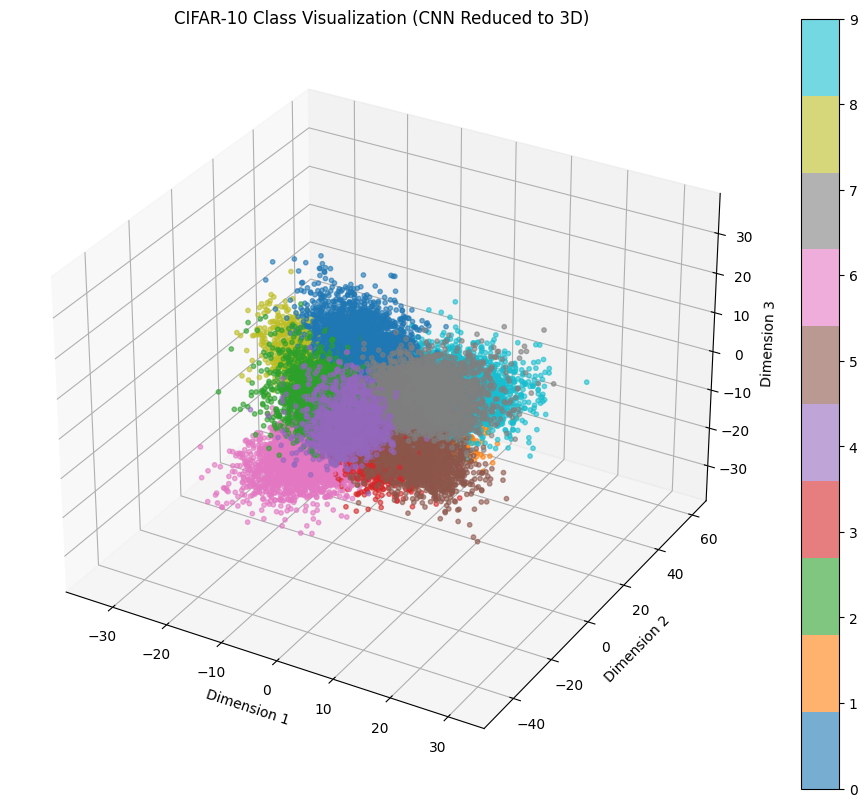

In [7]:
# Plot the reduced data in a 3D scatter plot
fig = plt.figure(figsize=(12, 10))  # Create a new figure with specified size
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
scatter = ax.scatter(
    reduced_data[:, 0],  # First dimension of the reduced data
    reduced_data[:, 1],  # Second dimension of the reduced data
    reduced_data[:, 2],  # Third dimension of the reduced data
    c=y_data.flatten(),  # Class labels for coloring
    cmap='tab10',  # Color map for 10 classes
    alpha=0.6,  # Transparency for the points
    s=10  # Marker size
)
plt.colorbar(scatter)  # Add a color bar to show class mappings
ax.set_title('CIFAR-10 Class Visualization (CNN Reduced to 3D)')  # Title of the plot
ax.set_xlabel('Dimension 1')  # Label for the X-axis
ax.set_ylabel('Dimension 2')  # Label for the Y-axis
ax.set_zlabel('Dimension 3')  # Label for the Z-axis
plt.show()  # Display the 3D scatter plot